In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x + b
  return y

In [33]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [34]:
x = torch.tensor([[2],[4]])
forward(x)

tensor([[ 7],
        [13]], grad_fn=<AddBackward0>)

In [35]:
from torch.nn import Linear
torch.manual_seed(1)

In [36]:
model = Linear(in_features=1, out_features=1)
print(model.weight, model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [37]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [38]:
x = torch.tensor([[2.0],[4.0],[5.0]])
print(model(x))

tensor([[0.5891],
        [1.6197],
        [2.1349]], grad_fn=<AddmmBackward>)


###Custom

In [0]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forwardd(self, x):
    pred = self.linear(x)
    return pred

In [40]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [41]:
x = torch.tensor([2.02])
model.forwardd(x)

tensor([0.5995], grad_fn=<AddBackward0>)

Text(0.5, 0, 'x')

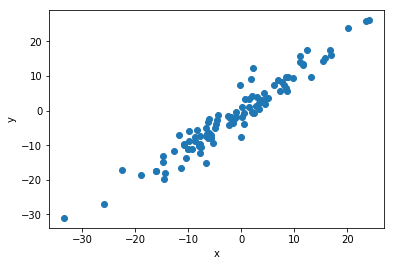

In [42]:
#creating Dataset
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

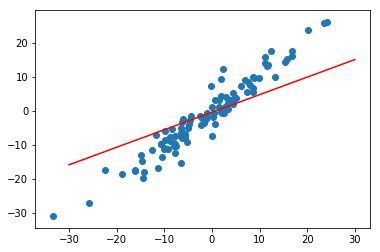

In [45]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [0]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forwardd(X)
  loss = criterion(y_pred, y)
  print('Epoch', i,"loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  

Text(0.5, 0, 'epoch')

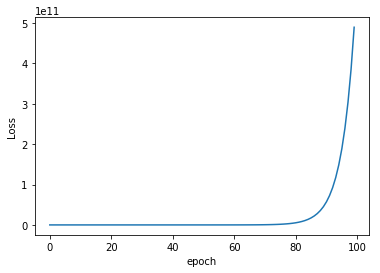

In [48]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

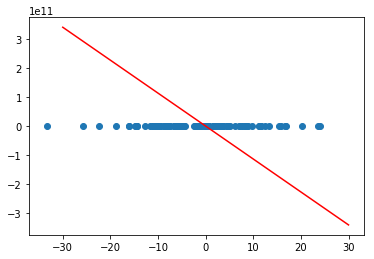

In [29]:
plot_fit("Trained Model")